DATA_SET: ../data/data-SNF3.csv

R2: 0.7464311202389311
EVS: 0.7475474987179751
MAE: 29.829167427564972
MSE: 1843.8147534138425

cross validation score: 
0.34075919121436443




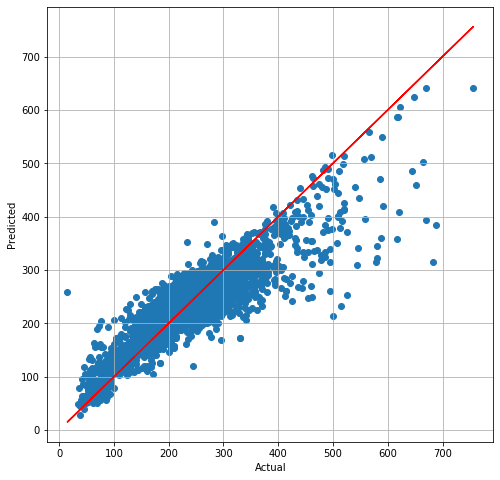

In [53]:
#######################################################################################################
# Import libraries
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
#######################################################################################################

# data_set = ['../data/data-SNA1.csv', '../data/data-SNF1.csv', '../data/data-SNA3.csv', '../data/data-SNF3.csv', '../data/data-MNF1.csv', '../data/data-MNA1.csv', '../data/data-MNF3.csv', '../data/data-MNA3.csv']
data_set = ["../data/data-SNF3.csv"]


for i in data_set:
    print("DATA_SET: " + i)
    X = pd.read_csv(i)
    y = X.pop('Operatieduur').values
    
    model = GradientBoostingRegressor(
        loss='huber',
        n_estimators=200,
        max_depth=5,
        max_features=25,
        random_state=0,
    )
    model.fit(X, y)

    predicted = model.predict(X)
    print('\nR2:', r2_score(y, predicted))
    print('EVS:', explained_variance_score(y, predicted))
    print('MAE:', mean_absolute_error(y, predicted))
    print('MSE:', mean_squared_error(y, predicted))
    score = np.mean(cross_val_score(model, X, y, cv=10, scoring='r2'))
    print("\ncross validation score: ")
    print(score)
    print("\n")
    
#     importances = model.feature_importances_
#     indices = np.argsort(importances)[::-1]

#     # Print the feature ranking
#     print("Feature ranking:")

#     for f in range(10):
#         print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

    plt.figure(figsize=[8.0,8.0])
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.scatter(y, predicted)
    plt.plot(y, y, color='r')
    plt.grid(True)
    plt.show()
